In [1]:
import os
from concurrent.futures import as_completed, ProcessPoolExecutor, ThreadPoolExecutor

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import fft
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


def to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


def load_img_with_features(filepath, label):
    img = cv2.imread(filepath)
    gray_img = to_gray(img)
    features = np.abs(fft.fft2(gray_img)).flatten()
    return features, label


def load_imgs_from_directory(directory, label, num_images=None):
    images = []
    labels = []
    files = os.listdir(directory)
    if num_images is not None:
        files = files[:num_images]
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(load_img_with_features, os.path.join(directory, filename), label) for filename
                   in files]
        for future in as_completed(futures):
            features, lbl = future.result()
            images.append(features)
            labels.append(lbl)
    return images, labels


fake_dir = "E:\\College\\5th Sem\\ML\\Lab\\train\\FAKE"
real_dir = "E:\\College\\5th Sem\\ML\\Lab\\train\\REAL"


num_images_to_load = 10000

fake_images, fake_labels = load_imgs_from_directory(fake_dir, 0, num_images=num_images_to_load)
real_images, real_labels = load_imgs_from_directory(real_dir, 1, num_images=num_images_to_load)

features = np.vstack((fake_images, real_images))
labels = np.concatenate((fake_labels, real_labels))


In [2]:
real_images_mean_feat_vec = np.mean(real_images, axis=0)
real_images_std_feat_vec = np.std(real_images, axis=0)
fake_images_mean_feat_vec = np.mean(fake_images, axis=0)
fake_images_std_feat_vec = np.std(fake_images, axis=0)

distance_between_mean_vecs = np.linalg.norm(real_images_mean_feat_vec - fake_images_mean_feat_vec)

data = {
    "Real Images Mean Feature Vector": real_images_mean_feat_vec,
    "Fake Images Mean Feature Vector": fake_images_mean_feat_vec,
    "Real Images Std Feature Vector": real_images_std_feat_vec,
    "Fake Images Std Feature Vector": fake_images_std_feat_vec,
}

df_a1_1 = pd.DataFrame(data).T
display(df_a1_1)
df_a1_2 = pd.DataFrame({"Mean Feat. Vec. Dist": [distance_between_mean_vecs]})
display(df_a1_2)


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
Real Images Mean Feature Vector,125881.484400,10538.498436,5397.240666,3515.274074,2621.915756,2057.916195,1664.463697,1409.662730,1202.606904,1035.133265,...,711.019850,827.980481,970.342996,1142.692907,1361.259500,1673.369540,2122.933584,2835.590149,4106.312103,7053.472711
Fake Images Mean Feature Vector,114909.178000,9529.360191,5163.091346,3353.632039,2480.073506,1956.583532,1623.610047,1374.603817,1170.048180,1009.086813,...,723.832064,831.430198,962.413933,1144.183215,1343.488743,1639.435238,2060.588996,2729.711033,3902.928612,6700.419024
Real Images Std Feature Vector,32132.160281,7143.788449,3748.440424,2426.588727,1820.644913,1423.480304,1169.071896,1004.100137,851.570240,748.304693,...,469.918855,545.071719,636.451632,753.268847,890.320213,1095.387899,1396.533357,1871.728994,2733.768215,4598.471309
Fake Images Std Feature Vector,21085.751338,6471.749457,3919.527348,2593.189758,1842.375102,1472.987416,1211.750504,1030.371631,870.803272,760.852831,...,504.559405,595.299616,682.875352,837.522359,976.129058,1185.111949,1526.821120,2019.918913,2894.928035,4615.257294


,Mean Feat. Vec. Dist
0,11860.345775


,r,dist
1,1,502990.122748
2,2,29536.952000
3,3,14937.395378
4,4,11749.956454
5,5,10591.903949
6,6,10060.529525
7,7,9776.241593
8,8,9604.217110
9,9,9489.062660
10,10,9405.656395


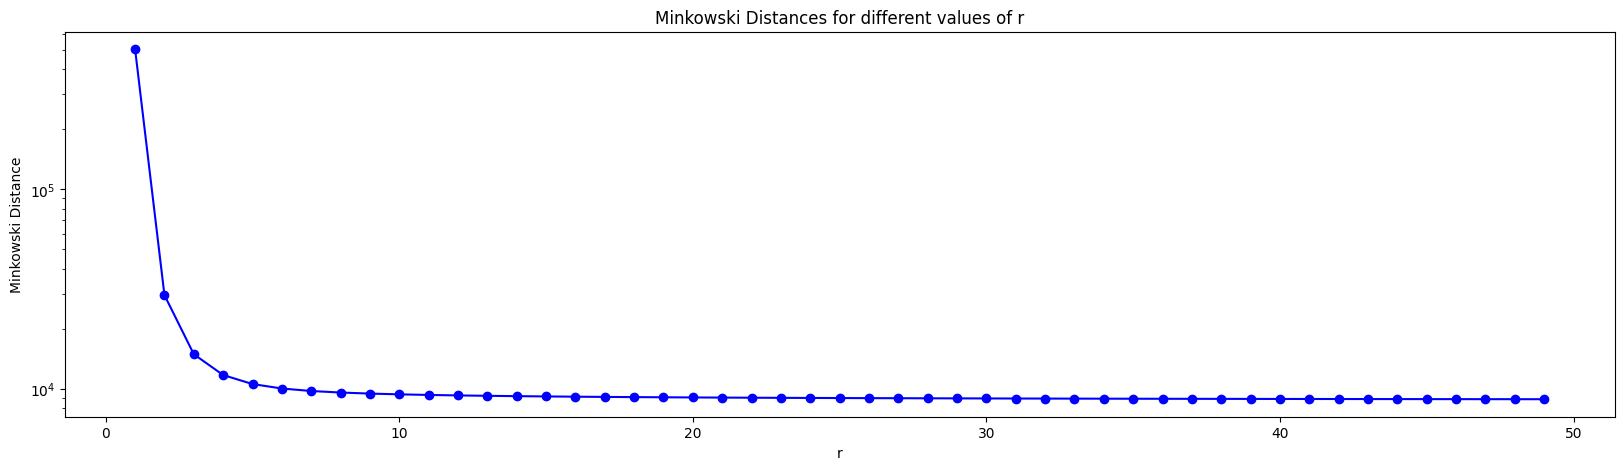

In [3]:
from scipy.spatial.distance import minkowski

data = {"r": [], "dist": []}
v1, v2 = features[0], features[1]

for i in range(1, 50):
    data["r"].append(i)
    data["dist"].append(minkowski(v1, v2, i))

data = pd.DataFrame(data, index=data["r"])

display(data)

plt.figure(figsize=(20, 5))
plt.xlabel("r")
plt.ylabel("Minkowski Distance")
plt.title("Minkowski Distances for different values of r")
plt.plot(data["r"], data["dist"], marker='o', linestyle='-', color='b')
plt.yscale("log")
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=32)

In [5]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [6]:
accuracy = knn.score(X_test, y_test)
print("Test Accuracy:", accuracy)

training_accuracy = knn.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy}")

Test Accuracy: 0.65075
Training Accuracy: 0.83075


In [7]:
predictions = knn.predict(X_test[:20])
actual_labels = y_test[:20]

predicted_vs_actual = pd.DataFrame({"Actual": actual_labels, "Predicted": predictions})

predicted_vs_actual.index += 1
predicted_vs_actual.index.name = "Observation"
predicted_vs_actual.T

Observation,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Actual,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,1,1,1,0,0
Predicted,1,1,0,1,1,1,0,0,0,1,1,1,0,1,0,0,1,1,0,0


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

k_values = range(1, 50)
accuracies = []
precisions = []
recalls = []
f1_scores = []

training_accuracies = []

for k in k_values:
    print(f"k:\t{k}")
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=8)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tc = knn.score(X_train, y_train)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    training_accuracies.append(tc)
accuracies_df = pd.DataFrame(
    {"K-Value": k_values, "Test Accuracy": accuracies, "Training Accuracy": training_accuracies, "Precision":
        precisions, "Recall": recalls, "F1- Score": f1_scores},
    index=k_values)

k:	1
k:	2
k:	3
k:	4
k:	5
k:	6
k:	7
k:	8
k:	9
k:	10
k:	11
k:	12
k:	13
k:	14
k:	15
k:	16
k:	17
k:	18
k:	19
k:	20
k:	21
k:	22
k:	23
k:	24
k:	25
k:	26
k:	27
k:	28
k:	29
k:	30
k:	31
k:	32
k:	33
k:	34
k:	35
k:	36
k:	37
k:	38
k:	39
k:	40
k:	41
k:	42
k:	43
k:	44
k:	45
k:	46
k:	47
k:	48
k:	49


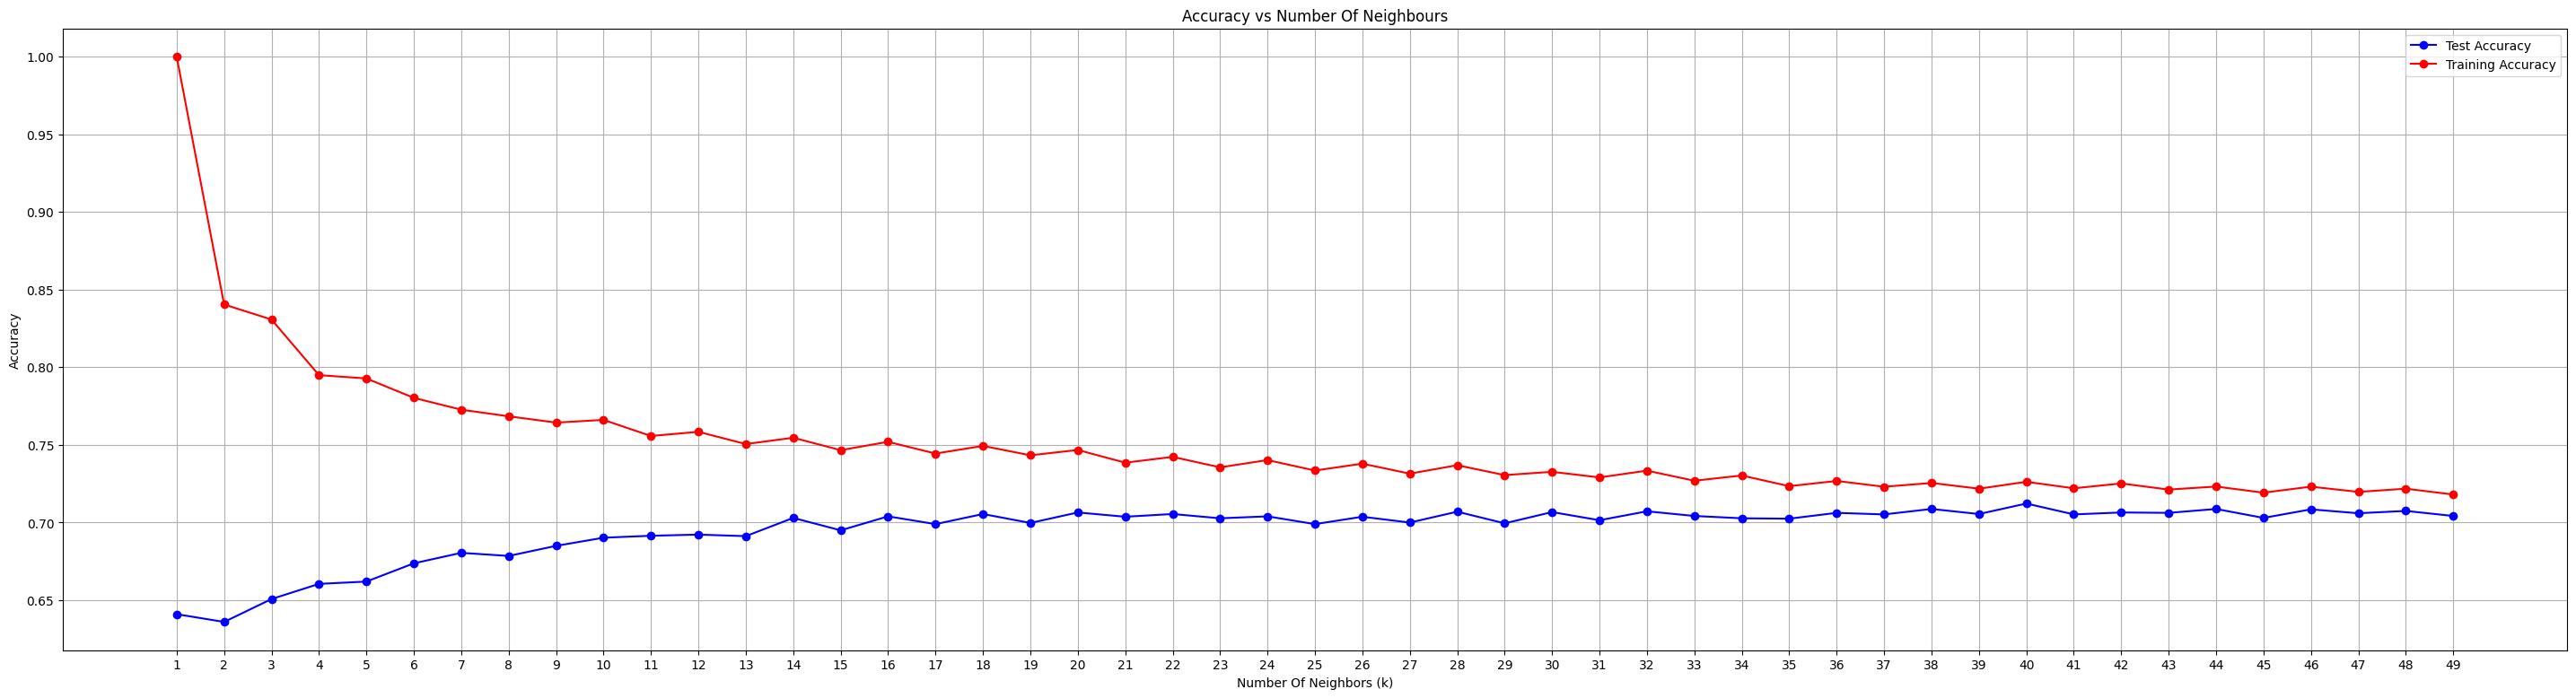

,K-Value,Test Accuracy,Training Accuracy,Precision,Recall,F1- Score,Accuracy Difference
1,1,0.64100,1.000000,0.628223,0.675744,0.651118,0.359000
2,2,0.63600,0.840437,0.695620,0.472516,0.562763,0.204437
3,3,0.65075,0.830750,0.634280,0.697932,0.664586,0.180000
4,4,0.66050,0.794937,0.688822,0.574887,0.626718,0.134437
5,5,0.66200,0.792813,0.642954,0.715582,0.677327,0.130812
6,6,0.67375,0.780312,0.685652,0.631367,0.657390,0.106563
7,7,0.68050,0.772687,0.657296,0.742814,0.697443,0.092187
8,8,0.67850,0.768437,0.682940,0.656077,0.669239,0.089938
9,9,0.68500,0.764375,0.661456,0.746848,0.701563,0.079375
10,10,0.69025,0.766125,0.691358,0.677761,0.684492,0.075875


In [9]:

accuracy_diff = [abs(i - j) for i, j in zip(accuracies, training_accuracies)]
accuracies_df["Accuracy     Difference"] = accuracy_diff

plt.figure(figsize=(36, 9))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label="Test Accuracy")
plt.plot(k_values, training_accuracies, marker='o', linestyle='-', color='r', label="Training Accuracy")
plt.title('Accuracy vs Number Of Neighbours')
plt.xlabel('Number Of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

accuracies_df

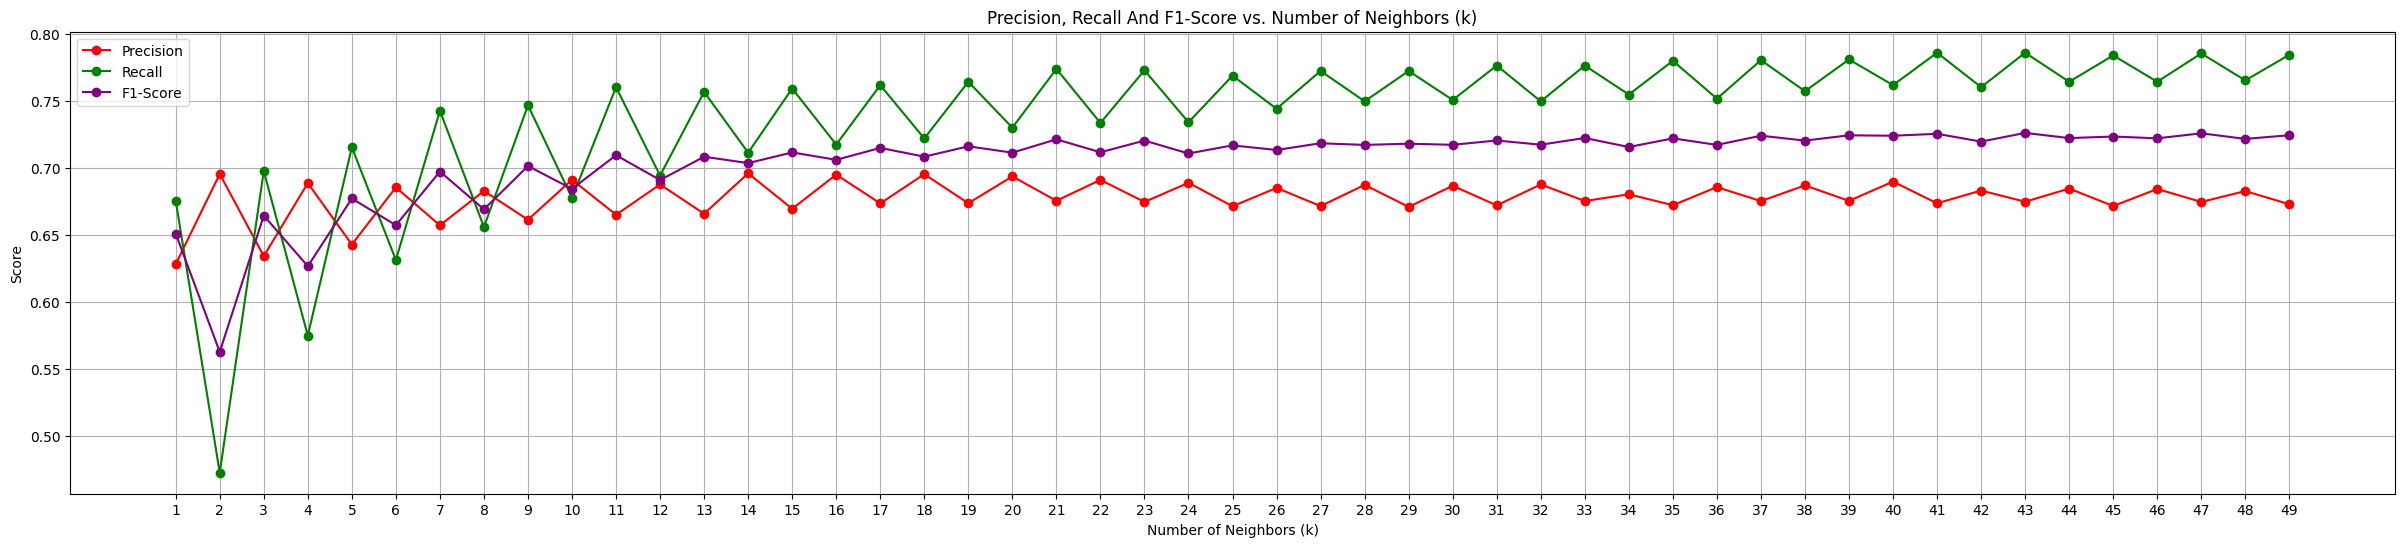

In [10]:
plt.figure(figsize=(30, 6))
plt.plot(k_values, precisions, marker='o', linestyle='-', color='r', label='Precision')
plt.plot(k_values, recalls, marker='o', linestyle='-', color='g', label='Recall')
plt.plot(k_values, f1_scores, marker='o', linestyle='-', color='purple', label='F1-Score')

plt.title('Precision, Recall And F1-Score vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

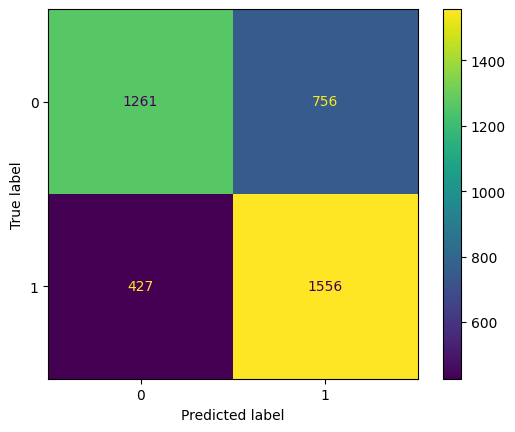

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

conf_mat = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=[0, 1])

# conf_mat.plot()   


In [12]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10, n_jobs=-1, scoring='precision')
print(cross_val_scores)

print(f"Mean precision cross-validation score:\t{cross_val_scores.mean()}")

[0.66738661 0.6691023  0.66358025 0.67735043 0.67167382 0.66916488
 0.68562232 0.65420561 0.66272825 0.67013528]
Mean precision cross-validation score:	0.6690949731777731


In [21]:
from sklearn.linear_model import LinearRegression

In [25]:
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)

In [35]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score

In [38]:
print(y_train_pred)
print(y_train)

[ 0.66324474  0.14041154 -0.36712078 ...  0.60482739  0.54991604
  0.61126937]
[0 1 0 ... 0 0 1]


In [36]:

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Mean Squared Error (MSE) on training data:\t{mse_train}")
print(f"Root Mean Squared Error (RMSE) on training data:\t{rmse_train}")
print(f"Mean Absolute Percentage Error (MAPE) on training data:\t{mape_train}")
print(f"R^2 Score on training data:\t{r2_train}")

Mean Squared Error (MSE) on training data:	0.15020178788570332
Root Mean Squared Error (RMSE) on training data:	0.38755875410794594
Mean Absolute Percentage Error (MAPE) on training data:	796165741128538.1
R^2 Score on training data:	0.39919013542514203
